**LEVEL 2: THAY ĐỔI CÁC QUẢ BÓNG MÀU ĐỎ THÀNH MÀU HỒNG**

import các packages cần thiết 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Input ảnh gốc và chuyển sang HSV

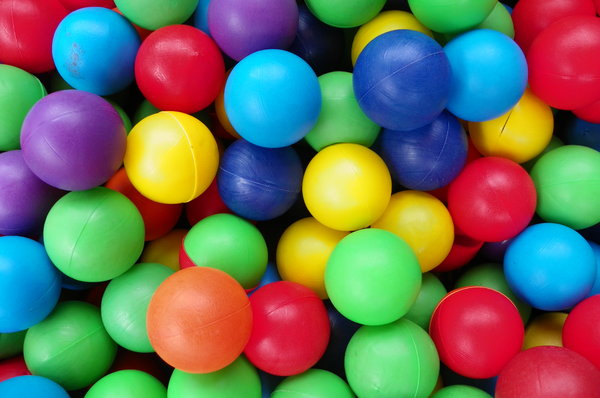

In [ ]:
image = cv2.imread("/content/colorball.jpg")
# convert từ BGR sang HSV
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2_imshow(image)

+ Xác định phạm vi màu đỏ trong không gian màu HSV
+ Tính toán, chuyển màu đỏ đã xác định sang màu khác (cam) trong không gian màu HSV
+ Convert ảnh trở lại BRG
+ Trích xuất các phần cần thiết cho kết quả

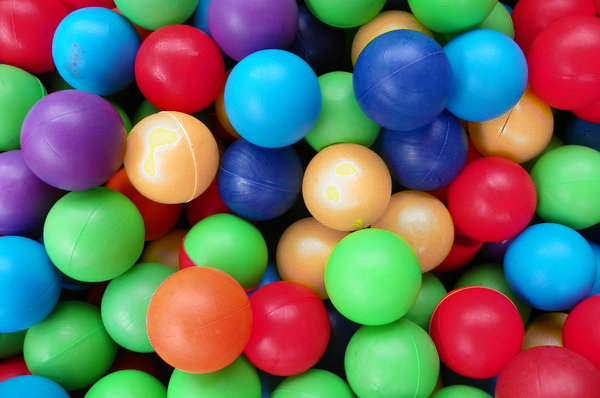

In [ ]:
# xác định phạm vi màu đỏ trong không gian màu HSV
yellow_lo=np.array([20, 100, 100])
yellow_hi=np.array([30, 255, 255])
mask=cv2.inRange(hsv,yellow_lo,yellow_hi)

# tính toán chuyển sang màu khác (cam)
h, s, v = cv2.split(hsv)
h = np.mod(h + 170, 180)
s = np.clip(s - 100, 0, 255)
v = np.clip(v, 0, 255)
hsv = cv2.merge([h, s, v])
# convert từ HSV sang BGR
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# trích xuất các phần cần thiết cho kết quả
inv_mask = cv2.bitwise_not(mask)
result = cv2.bitwise_or(cv2.bitwise_and(image, image, mask=inv_mask), cv2.bitwise_and(bgr, bgr, mask=mask))
cv2_imshow(result)